In [47]:
from scipy import stats as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
#Cargar el dataset en un dataframe
games=pd.read_csv("C:\\Users\\steph\\.vscode\\Bootcamp\\games.csv")

In [49]:
#Obtener Información general del dataset
print(games.info())

**PASO 2: PREPARA LOS DATOS**

In [50]:
#Reemplaza los nombres de las columnas (ponlos en minúsculas).
games.columns = games.columns.str.lower()

print(games.info())

In [51]:
#Convierte los datos en los tipos necesarios.
games['user_score'] = pd.to_numeric(games['user_score'],errors='coerce')
games['rating'] = pd.to_numeric(games['rating'],errors='coerce')
#Se utiliza errors='coerce' para convertir a NaN datos que no puedan ser convertidos a numéricos en caso de haberlos
print(games.info())

**Describe las columnas en las que los tipos de datos han sido cambiados y explica por qué.**

Se debe cambiar el tipo de dato que se muestra en la columna user_score y rating pues estos datos son de tipo numéricos por lo que indica el nombre de la columna, por lo que se deben tratar como tales pra evitar posibles erroes en el análisis

**Si es necesario, elige la manera de tratar los valores ausentes:**
**Explica por qué rellenaste los valores ausentes como lo hiciste o por qué decidiste dejarlos en blanco.**

1- la columna 'name' tiene 2 valores nulos, por lo que estas dos filas deben ser eliminadas pues el objetivo de este análisis de datos es identificar los patrones que determinen si un juego tiene éxito o no.Sin el nombre del juego no es posible concluir algo respecto a eso

2-la columna 'year_of_release' tiene 269 valores nulos, estas filas se eliminarán porque est columna contiene un dato que es de gran significancia para el análisis posterior al tener que responder a la pregunta de qué tan significtiva es la cantidad de juegos lanzados por año.

3- la columna 'genre' tiene 2 valores nulos, las filas que contengan estos valore nulos deben ser eliminadas pues es parte del análisis final el decir algo sobre qué genero es más rentable y si es posible generalizar 

4- la columnas 'critic_score' y 'user_score' tienen 8578 y 9125 valores nulos respectivamente, es decir, más del 50% de los datos en las columnas 'critic_score' y 'user_score' son datos nulos, por lo que se opta primero por ver la variabilidad de los datos para decidir si reemplazar aquellos datos nulos con la media o varianza o simplemente eliminarlos del análisis.

In [52]:
#Eliminamos valores nulos en columns 'name' , 'year_of_release' y 'genre'
games=games.dropna(subset=['name'])
games=games.dropna(subset=['year_of_release'])
games=games.dropna(subset=['genre'])

print(games.info())

In [53]:
#estudiamos variabilidad de los datos en las columnas 'critic_score' y 'user_score'

media_critic_score= games['critic_score'].mean()
mediana_critic_score= games['critic_score'].median()
varianza_critic_score= games['critic_score'].var()

media_user_score= games['user_score'].mean()
mediana_user_score= games['user_score'].median()
varianza_user_score= games['user_score'].var()

print(f"CRITIC_SCORE")
print(f"media :{media_critic_score}")
print(f"mediana :{mediana_critic_score}")
print(f"varianza :{varianza_critic_score}")

print(f"USER_SCORE")
print(f"media :{media_user_score}")
print(f"mediana :{mediana_user_score}")
print(f"varianza :{varianza_user_score}")

En el caso de la columna 'critic_score' la media es menor que la mediana, esto sugiere que hay valores atípicos desde la media hacia abajo lo que significa que algunos críticos están proprocionando calificaciones más bajas
En el caso de la columna 'user_score' la media es menor que la mediana, esto sugiere que hay valores atípicos desde la media hacia abajo lo que significa que algunos usuarios están proprocionando calificaciones más bajas.

Por lo tanto, en ambas columnas parece ser que se tienen dos opciones: imputar los valores nulos con la mediana de cada uno de ellos con el fin de minimizar el impacto de los valores extremos o eliminar de lleno aquellos valores que son nulos.
Se codifican ambas condiciones y luego se comprueban nuevamente al estadistica de estas columnas, se debe permanecer con la opción que signifique menos impacto en la estadistica para los datos de ambas columnas

In [54]:
#primero guardamos una copia de ambas columnas originales pues luego de comrpobar la estdistica de esos datos luego de la imputación trabajaremos nuevamente
#sobre la columna original para esta vez eliminar los valores nulos y sacar nuevamente la estadística

games['original_critic_score']=games['critic_score']
games['original_user_score']=games['user_score']

In [55]:
games['critic_score'] = games['critic_score'].fillna(71)  # Imputación con la mediana
games['user_score'] = games['user_score'].fillna(7.5)

In [56]:
#Se comprueba nuevamente la estadistica descriptiva
media_critic_score= games['critic_score'].mean()
mediana_critic_score= games['critic_score'].median()
varianza_critic_score= games['critic_score'].var()

media_user_score= games['user_score'].mean()
mediana_user_score= games['user_score'].median()
varianza_user_score= games['user_score'].var()

print(f"CRITIC_SCORE")
print(f"media :{media_critic_score}")
print(f"mediana :{mediana_critic_score}")
print(f"varianza :{varianza_critic_score}")

print(f"USER_SCORE")
print(f"media :{media_user_score}")
print(f"mediana :{mediana_user_score}")
print(f"varianza :{varianza_user_score}")

In [57]:
#Se revierte primero la imputación utilizando la columna original previamente a eliminar las filas con valores nulos
games['critic_score']=games['original_critic_score']
games['user_score']=games['original_user_score']

In [58]:
#se eliminan valores nulos de columnas 'critic_score' y 'user_score' 
games=games.dropna(subset=['critic_score'])
games=games.dropna(subset=['user_score'])

#se comprueba la estadistica al eliminar los valores nulos
media_critic_score= games['critic_score'].mean()
mediana_critic_score= games['critic_score'].median()
varianza_critic_score= games['critic_score'].var()

media_user_score= games['user_score'].mean()
mediana_user_score= games['user_score'].median()
varianza_user_score= games['user_score'].var()

print(f"CRITIC_SCORE")
print(f"media :{media_critic_score}")
print(f"mediana :{mediana_critic_score}")
print(f"varianza :{varianza_critic_score}")

print(f"USER_SCORE")
print(f"media :{media_user_score}")
print(f"mediana :{mediana_user_score}")
print(f"varianza :{varianza_user_score}")

Se observa que eliminar aquellos valores nulos nos permiten mantener nuestra estadística lo más intacta posible y es por ello que se utiliza esta opción para terminar de limpiar los datos que se utilizarán de quí en adelante: Finalmente se tienen 6894 registros que servirán para identificar los patrones que podrían influir o no en el éxito de un juego.

In [59]:
print(games.info())


**¿Por qué crees que los valores están ausentes? Brinda explicaciones posibles.**

Por una parte, se puede suponer que el sistema o la estrategia que se utiliza para calificar los juegos no son lo suficientemente eficientes.Es decir, quizás el usuario no se sienta con el deber o responsabilidad de aportar dando algun reseña y calificacion .
Por otro lado, es probable que los datos no se registraron  aun cuando tanto usuario como profesional si dieron sus reseñas.

Finalmente, se tiene toda un columna solo con valores ausentes y es la que corresponder a 'rating'.Aquí se puede intuir que la clasificación ESRB de los juegos puede:

1- Mo haber existido cuando se armó este dataset

2- No se hizo ninguna clasificción del contenido del juego en el plazo que se consideró para el análisis.

3- Que los datos se hayan tomado pero no se guardaron adecuadamente.

De todas maneras, no es necesario para este análisis conocer este valor.

In [60]:
#-Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.

games['total_sales']=games[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

print(games.sample())

**PASO 3: ANALIZA LOS DATOS**

In [61]:
#Mira cuántos juegos fueron lanzados en diferentes años. 
games_per_year=games.groupby('year_of_release').size().reset_index(name='count')

print(games_per_year)



In [62]:
#se obtiene la estadística de los datos para estudiar cómo se comportan estos 
media_count=games_per_year['count'].mean()
mediana_count=games_per_year['count'].median()
varianza_count=games_per_year['count'].var()

print(f"media :{media_count}")
print(f"mediana :{mediana_count}")
print(f"varianza :{varianza_count}")

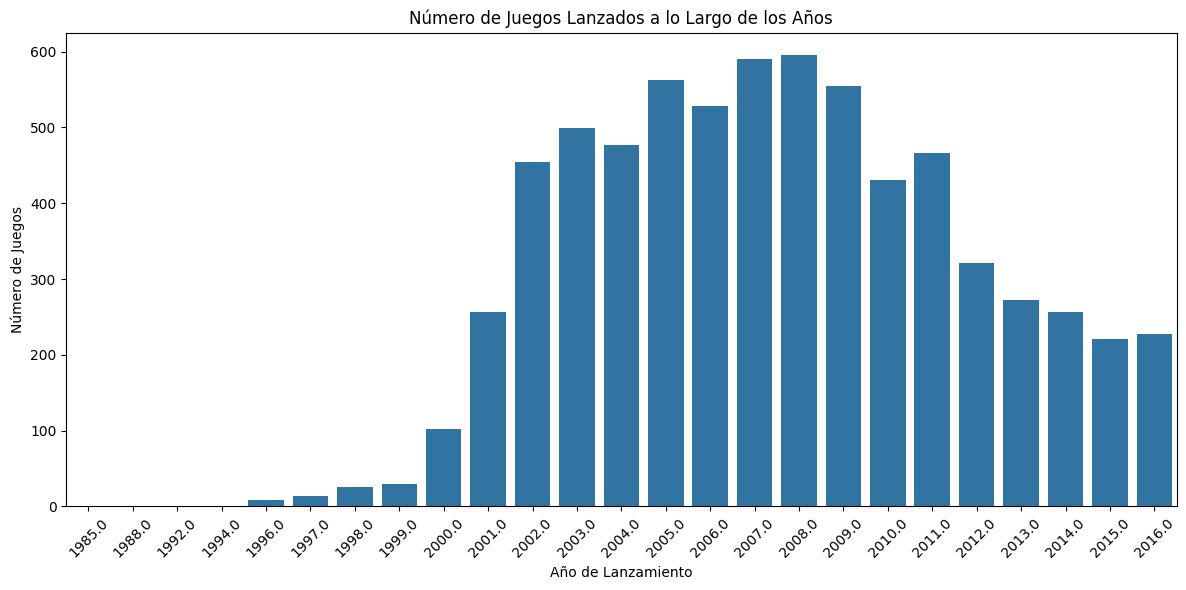

In [63]:
#se crea gráfico de barras para visualizar el numero de juegos lanzados a lo largo de los años

plt.figure(figsize=(12, 6))
sns.barplot(data=games_per_year, x='year_of_release', y='count')

# Personalizar el gráfico
plt.title('Número de Juegos Lanzados a lo Largo de los Años')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Número de Juegos')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor visualización
plt.tight_layout()

# Mostrar el gráfico
plt.show()

**¿Son significativos los datos de cada período?**

Se observa una media (275,76)  mayor que la mediana (256) esto indica que la distribución de los datos es asimétrica y sesgada hacia la derecha (se observa también en el gráfico de barras).Esto indicaría que la mayor cantidad de juegos lanzados estaría concentrada entre los años 2001 y 2016.
Si se observa la varianza, por otra parte, se ve que el valor de esta es muy alto (50406.77) lo que indica gran dispersión de los datos y la existencia de valores atípicos muy por debajo de la media.



In [64]:
#Observa cómo varían las ventas de una plataforma a otra.

games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
sales_per_platform = games.groupby('platform')['total_sales'].sum().reset_index()

print(sales_per_platform)

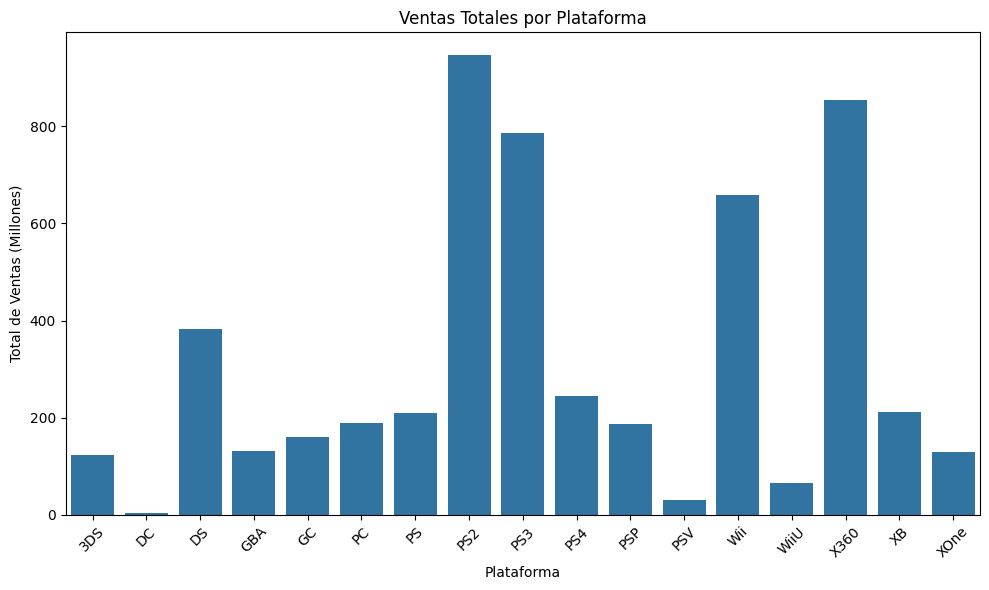

In [65]:
#creo un gráfico de barras para visualizar las ventas por plataforma
plt.figure(figsize=(10, 6))
sns.barplot(data=sales_per_platform, x='platform', y='total_sales')

# Personalizar el gráfico
plt.title('Ventas Totales por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Total de Ventas (Millones)')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor visualización
plt.tight_layout()

# Mostrar el gráfico
plt.show()

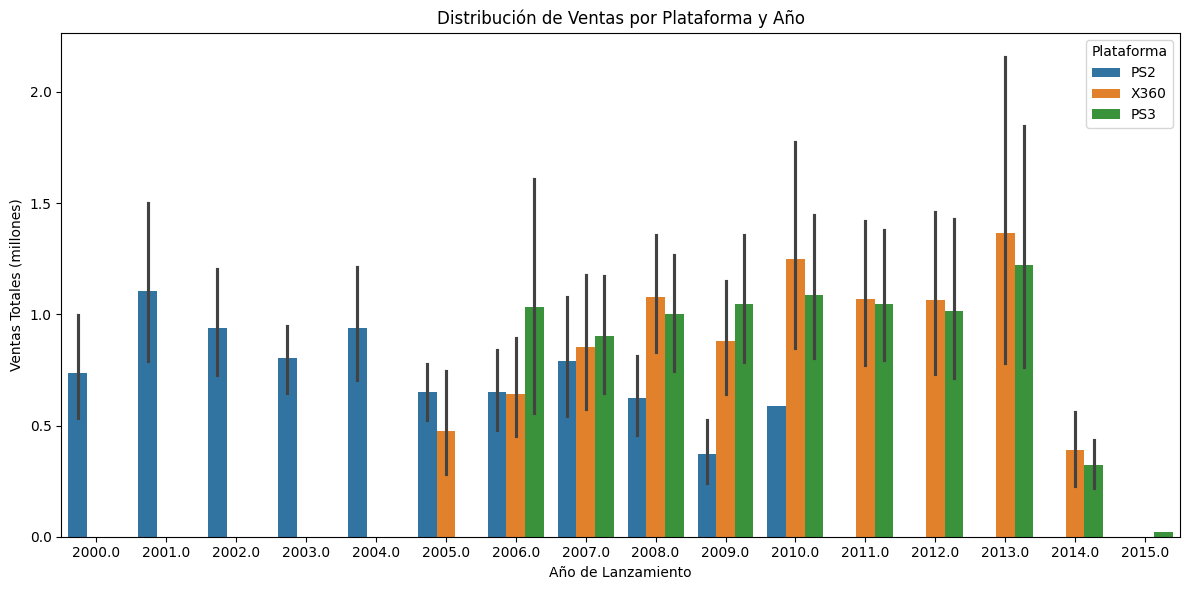

In [66]:
#Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año

#se eligen las 3 primeras mayorías de ventas por plataforma 
top_platforms = sales_per_platform.nlargest(3, 'total_sales')

# se obtienen btener las plataformas seleccionadas en una lista 'top_platform_names'
top_platform_names = top_platforms['platform'].tolist()
# filtrar los datos para las plataformas seleccionadas
filtered_games = games[games['platform'].isin(top_platform_names)]

# Trazar un gráfico de distribución
plt.figure(figsize=(12, 6))
sns.barplot(data=filtered_games, x='year_of_release', y='total_sales', hue='platform')

# Personalizar el gráfico
plt.title('Distribución de Ventas por Plataforma y Año')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas Totales (millones)')
plt.legend(title='Plataforma')
plt.tight_layout()

# Mostrar el gráfico
plt.show()


Se observa que de las tres plataformas con más ventas, PS2 es la más antigua, aparece en el año 2000 y desaparece en el año 2011, teniendo 10 años de permanencia en el mercado.
Por otro lado, la plataforma X360 inicia ventas en el año 2005 y desaparece en el año 2015, teniendo 

In [67]:
#Busca las plataformas que solían ser populares pero que ahora no tienen ventas. 

#análisis de aparición y desaparición de plataformas
# Obtener las primeras y últimas apariciones
platforms_release_info = games.groupby('platform')['year_of_release'].agg(['min', 'max']).reset_index()
platforms_release_info.columns = ['platform', 'first_release_year', 'last_release_year']

# Calcular el tiempo que tardan en aparecer y desaparecer considerndo que el 2016 es el último año del que se tienen datos
platforms_release_info['time_to_appear'] = platforms_release_info['first_release_year'] - platforms_release_info['first_release_year'].min()
#Calcular el tiempo que tardan en desaparecer 
platforms_release_info['time_to_disappear'] = np.where(
    platforms_release_info['last_release_year'] == 2016,
    0,
    platforms_release_info['last_release_year'] - platforms_release_info['first_release_year']
)


# mostrar la información
print("\nTiempo para aparición y desaparición de plataformas:")
print(platforms_release_info)

In [68]:
#obtengo la estadística de la columna 'time_to_appear'
#no se consideran aquellos que tiene valor cero pues esto no aporta a lo que quiero saber (cuánto tardan en general en aparecer las plataformas)
filtered_time_to_appear = platforms_release_info.loc[platforms_release_info['time_to_appear'] != 0, 'time_to_appear']

#Calcular media, mediana y varianza
media_time_to_appear = filtered_time_to_appear.mean()
mediana_time_to_appear = filtered_time_to_appear.median()
varianza_time_to_appear = filtered_time_to_appear.var()

# Imprimir resultados
print(f"Media del tiempo para aparecer: {media_time_to_appear:.2f} años")
print(f"Mediana del tiempo para aparecer: {mediana_time_to_appear:.2f} años")
print(f"Varianza del tiempo para aparecer: {varianza_time_to_appear:.2f} años^2")

In [69]:
#obtengo estadística de la columna 'time_to_disappear'
#no se consideran aquellos que tiene valor cero pues esto no aporta a lo que quiero saber (cuánto tardan en general en desaparecer las plataformas)
filtered_time_to_disappear = platforms_release_info.loc[platforms_release_info['time_to_disappear'] != 0, 'time_to_disappear']

#Calcular media, mediana y varianza
media_time_to_disappear = filtered_time_to_disappear.mean()
mediana_time_to_disappear = filtered_time_to_disappear.median()
varianza_time_to_disappear = filtered_time_to_disappear.var()

# Imprimir resultados
print(f"Media del tiempo para desaparecer: {media_time_to_disappear:.2f} años")
print(f"Mediana del tiempo para desaparecer: {mediana_time_to_disappear:.2f} años")
print(f"Varianza del tiempo para desaparecer: {varianza_time_to_disappear:.2f} años^2")

**¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?**

Primero, se considera que una pltaforma desaparece cuando la fecha de su ultimo lanzamiento, 'last_release_year', es menor a 2016, que es el último año del que se tiene datos.
Una vez obtenidos los tiempos que demoran en aparecer nuevas plataformas y desaprecer las antiguas se obtiene la estadística de la informción contenida en ambas columnas. De la columna 'time_to_appear' se observa una media de 20 años, esto indica que la distribución de los años de lanzamiento es relativamente simétrica y que la mayoría de las plataformas tardan, en promedio alrededor de 20 años en aparecer.La varianza, por otra parte, al ser un valor alto indica que hay una dispersión considerable en el tiempo que tardan las plataformas en aparecer.Esto indica que algunas plataformas llegn más rápido al mercado que otras que a su vez podría estar relacionado con cambios en la tecnologóa o videojuegos del mercado.
De la columna 'time_to_disapear' se observa una media de 7.18 años y una mediana de 8 años, o que indica que una vez lanzadas, las plataformas tienen una duración promedio moderada antes de desaparecer del mercado. La varianza es un valor bajo, lo que indica que el tiempo que tardan en desaparecer las plataformas tiene una distribución más uniforme en comparación con el tiempo que tardn en aparecer.Esto podría dugerir que, en general, una vez que una plataforma se establece, existe un rango más controlado de duración.

**Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.**

Al momento de analizar la cantidad de juegos lanzados por año, se ve claramente que hasta antes del año 2001 la cantidad de lanzamientos está pa muy por debajo de la media, lo que provoca que la varinza de los datos sea muy alta y existan estos valores atípicos. Po esto es que no se considerarán los datos desde el 2001 al 2016 para los siguientes análisis

In [70]:
games = games[games['year_of_release'] >= 2001].reset_index()
print("\nDataFrame después de eliminar filas con 'year_of_release' menor a 2001:")
print(games.info())


In [71]:
#¿Qué plataformas son líderes en ventas? 


#se calculan las ventas totales por plataforma
games['total_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
total_sales_per_platform = games.groupby('platform')['total_sales'].sum().reset_index()

#se agrupa por plataforma y año, y se suman las ventas
sales_by_year_platform = games.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack(fill_value=0)

#plataformas que son líderes en ventas
print("Ventas totales por plataforma:")
print(total_sales_per_platform)

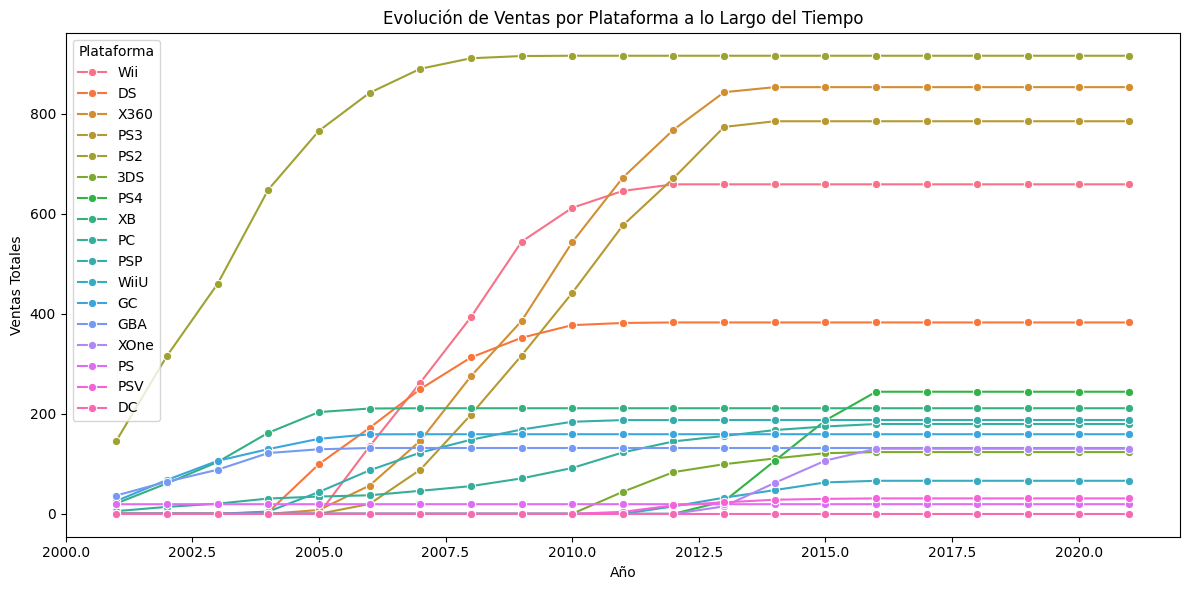

In [72]:
#¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.
# Calcular ventas totales
games['total_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Paso 1: Crear un DataFrame para ventas por año y plataforma
years_range = range(2001, 2022)  # Rango de años
sales_records = []  # Lista para almacenar los registros de ventas

# Recopilar las ventas por año para cada plataforma
for platform in games['platform'].unique():
    platform_games = games[games['platform'] == platform]
    for year in years_range:
        total_sales = platform_games[platform_games['year_of_release'] <= year]['total_sales'].sum()
        sales_records.append({'year': year, 'platform': platform, 'sales': total_sales})

# Convertir la lista de registros a un DataFrame
sales_by_year = pd.DataFrame(sales_records)

# Paso 2: Calcular el crecimiento o la disminución
sales_by_year['growth'] = sales_by_year.groupby('platform')['sales'].diff().fillna(0)

# Imprimir el DataFrame con las ventas y el crecimiento
print(sales_by_year)

# Paso 3: Visualizar la evolución de las ventas
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_by_year, x='year', y='sales', hue='platform', marker='o')

# Personalizar el gráfico
plt.title('Evolución de Ventas por Plataforma a lo Largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Ventas Totales')
plt.legend(title='Plataforma')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Se observa que las plataformas con mayor crecimiento son DS,Wii,X360,PS3,PS2

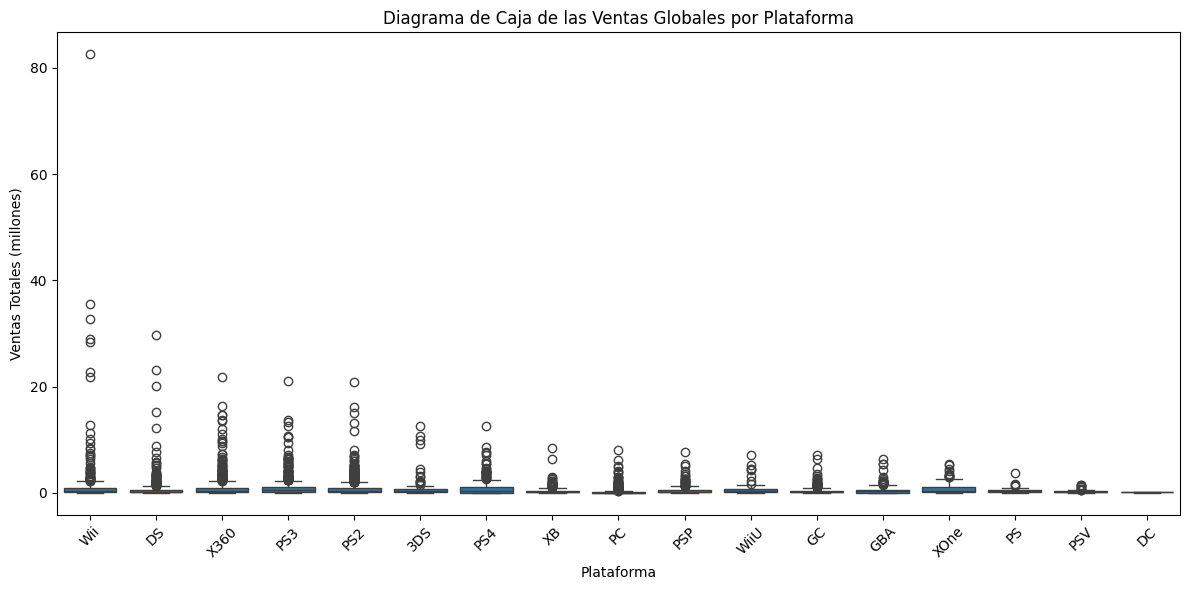

In [73]:
#Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma.

# Calcular ventas totales
games['total_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

#Crear un diagrama de caja para las ventas globales por plataforma
plt.figure(figsize=(12, 6))
sns.boxplot(data=games, x='platform', y='total_sales')

# Personalizar el gráfico
plt.title('Diagrama de Caja de las Ventas Globales por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales (millones)')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor visualización
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [74]:
#se calcula el promedio de ventas para cada plataforma a lo largo de los años

# Paso 1: Calcular las ventas totales en un nuevo DataFrame
games['total_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Paso 2: Crear un nuevo DataFrame para las estadísticas
platform_stats = games.groupby('platform').agg(
    average_sale=('total_sales', 'mean'),
    median_sales=('total_sales', 'median'),
    var_sales=('total_sales', 'var')
).reset_index()

# Agregar el año de lanzamiento
year_stats = games.groupby('platform')['year_of_release'].agg('first').reset_index()
platform_stats = pd.merge(platform_stats, year_stats, on='platform')

# Renombrar la columna para claridad
platform_stats.rename(columns={'year_of_release': 'first_release_year'}, inplace=True)

# Presentar el nuevo DataFrame
print(platform_stats)

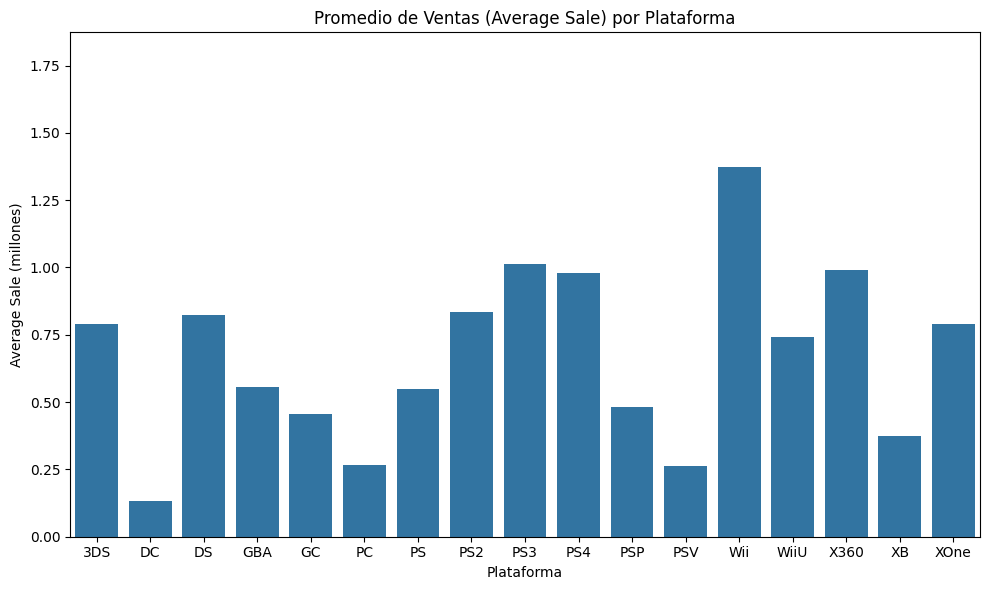

In [75]:


# Crear un gráfico de barras para la relación entre average_sale y la plataforma
plt.figure(figsize=(10, 6))
sns.barplot(data=platform_stats, x='platform', y='average_sale')

# Personalizar el gráfico
plt.title('Promedio de Ventas (Average Sale) por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Average Sale (millones)')
plt.ylim(0, platform_stats['average_sale'].max() + 0.5)  # Ajustar límites del eje y
plt.tight_layout()

# Mostrar el gráfico
plt.show()

**¿Son significativas las diferencias en las ventas?** 

Para saber si son significtivas las diferencias en las ventas a traves de los ños para una sola plataforma, se debe observar la varianza de estos datos.El valor más alto se encuentra en la plataforma Wii y es un valor muy por sobre la mediana de estos datos; por lo que se puede considerar la existencia de  valores atípicos.


**¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.**

En general, el promedio se encuentra por debajo de 1 y aquellas que son mayores a este valor son PS3 y Wii; esto podría ser un indicador de popularidad de estas plataformsa.

Por otra parte los valores más bajos corresponden a las plataformas DC, PC, PSV; esto podría ser un indicador de la baja popularidad de la plataforma.
 

In [76]:
#Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección).

#calculo la estadistica de los valores de ls criticas de profesionales y usuarios para cada plataforma
platform_score=  games.groupby('platform').agg(
    average_critic_score=('critic_score', 'mean'),
    median_critic_score=('critic_score', 'median'),
    average_user_score=('user_score', 'mean'),
    median_user_score=('user_score', 'median')
).reset_index()

print(platform_score)



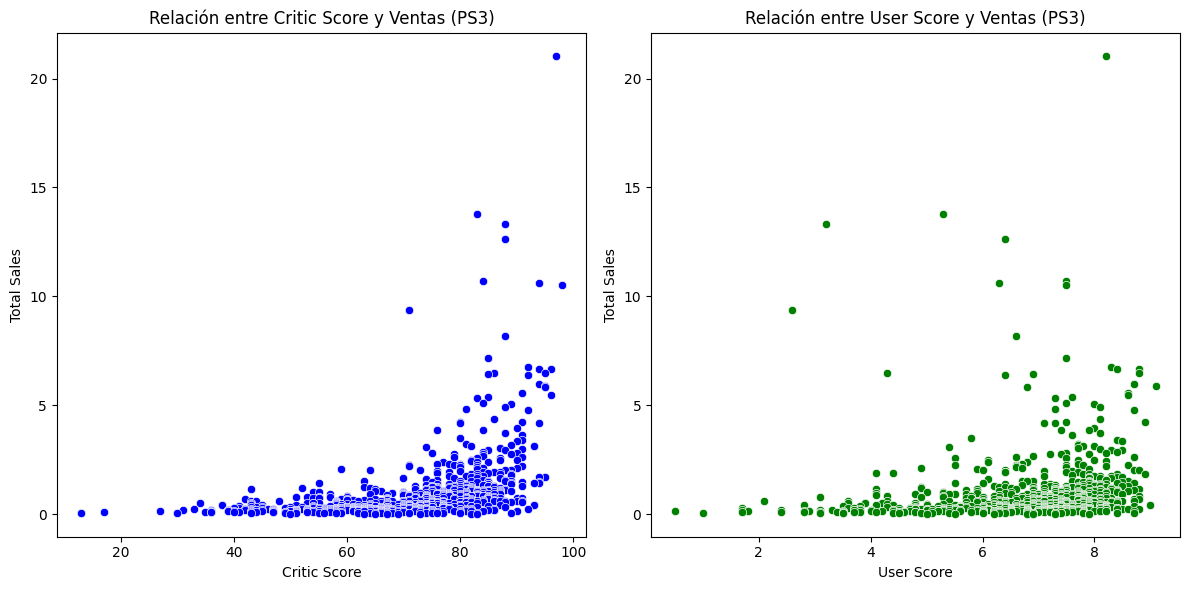

In [77]:

#se elige la pltaforma PS3 para ver cómo las reseñas afectan a las ventas 

# Calcular ventas totales
games['total_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

#filtrar para la plataforma PS3
ps3_data = games[games['platform'] == 'PS3']

# Visualización de la relación entre scores y ventas
plt.figure(figsize=(12, 6))

# Scatterplot para las reseñas de críticos
plt.subplot(1, 2, 1)
sns.scatterplot(data=ps3_data, x='critic_score', y='total_sales', color='blue', marker='o')
plt.title('Relación entre Critic Score y Ventas (PS3)')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales')

# Scatterplot para las reseñas de usuarios
plt.subplot(1, 2, 2)
sns.scatterplot(data=ps3_data, x='user_score', y='total_sales', color='green', marker='o')
plt.title('Relación entre User Score y Ventas (PS3)')
plt.xlabel('User Score')
plt.ylabel('Total Sales')

plt.tight_layout()
plt.show()

#se calculan y muestran correlaciones entre críticas y ventas de la plataforma PS3
critic_corr = ps3_data['critic_score'].corr(ps3_data['total_sales'])
user_corr = ps3_data['user_score'].corr(ps3_data['total_sales'])

print(f"Correlación entre sritic_score y total_sales: {critic_corr:.2f}")
print(f"Correlación entre user_score y total_sales: {user_corr:.2f}")

**Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.**

El valor de correlación entre critic_score y total_sales es de 0.43, un valor que indica una correlación moderada positiva entre ls puntuaciones otrogadas por los críticos y las ventas de los juegos.Es decir, a medida que aumenta la puntuación de los críticos, las ventas podrían tender a aumentar también.

El valor de correlación entre user_score y total_sales es 0.14, indica una relación positiva pero débil entre las puntuaciones otorgdas por los usuarios y las ventas de los juegos.Es decir, no se pueden deducir directamente las ventas solo observando las puntuaciones otorgadas por los usuario

In [78]:
#Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.

# Calcular ventas totales
games['total_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Agrupar por juego y plataforma para obtener las ventas
sales_by_game_platform = games.groupby(['name', 'platform'])['total_sales'].sum().reset_index()

# Filtrar las ventas de PS3
ps3_sales = sales_by_game_platform[sales_by_game_platform['platform'] == 'PS3']

# Merge para comparar ventas
comparison = pd.merge(sales_by_game_platform, ps3_sales[['name', 'total_sales']], on='name', suffixes=('', '_PS3'))

# Renombrar columnas para claridad
comparison.rename(columns={'total_sales_PS3': 'PS3_sales'}, inplace=True)

# Agregar una columna que muestre la diferencia de ventas
comparison['sales_difference'] = comparison['total_sales'] - comparison['PS3_sales']


# Mostrar resultados
print("Comparación de ventas de juegos lanzados en PS3 con otras plataformas:")
print(comparison.head(n=15))



In [79]:
# Contar los valores iguales a cero en la columna 'sales_difference'
zero_count = (comparison['sales_difference'] == 0).sum()

# Imprimir el conteo de valores iguales a cero
print(f"Número de valores iguales a cero en 'sales_difference': {zero_count}")

In [80]:
# Contar los valores menores a cero en la columna 'sales_difference'
negative_count = (comparison['sales_difference'] < 0).sum()

# Imprimir el conteo de valores menores a cero
print(f"Número de valores menores a cero en 'sales_difference': {negative_count}")

In [81]:
# Contar los valores mayores a cero en la columna 'sales_difference'
positive_count = (comparison['sales_difference'] > 0).sum()

# Imprimir el conteo de valores menores a cero
print(f"Número de valores mayores a cero en 'sales_difference': {positive_count}")

Hay 811 valores de sales_difference menores a cero, es decir, 'total_sales', que corresponden a las ventas de la plataforma que se indica, es menor a  las ventas en la plataforma PS3.
Hhay 406 valores de sales_difference mayores a cero, es decir las ventsa de una plataforma distinta a las de PS3 son mayores a las conseguidas en la plataforma PS3.

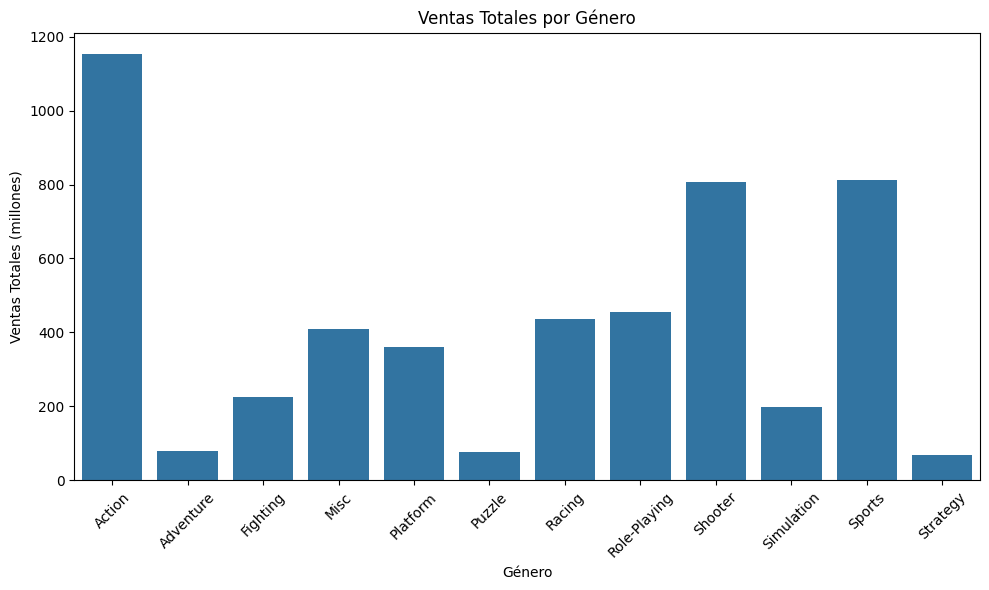

In [82]:
#Echa un vistazo a la distribución general de los juegos por género. 


# Calcular las ventas totales
games['total_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# agrupar por género y calcular las ventas totales
sales_by_genre = games.groupby('genre')['total_sales'].sum().reset_index()


# Imprimir el resultado por género
print("Ventas totales por género:")
print(sales_by_genre)

# Graficar las ventas por género
plt.figure(figsize=(10, 6))
sns.barplot(data=sales_by_genre, x='genre', y='total_sales')

# Personalizar el gráfico
plt.title('Ventas Totales por Género')
plt.xlabel('Género')
plt.ylabel('Ventas Totales (millones)')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor visualización
plt.tight_layout()

# Mostrar el gráfico
plt.show()



In [83]:
# Calcular las estadísticas deseadas
sales_stats = sales_by_genre['total_sales'].agg(
    mean='mean',
    median='median',
    variance='var',
    maximum='max',
    minimum='min'
).reset_index(name='value')

# Renombrar la columna para mayor claridad
sales_stats.columns = ['Statistic', 'Value']

# Imprimir el resultado de estadísticas
print("Estadísticas de total_sales por género:")
print(sales_stats)

**¿Qué se puede decir de los géneros más rentables?**

Los géneros que se observan con mayores ventas es lo que se pueden considerar los más rentables: Action, Shooter y Sport.
La media del total de ventas agrupado por géneros es mayor que la mediana, esto quiere decir que existe un acumulación de las ventas de juegos de algunos géneros (los valores máximos mencionados inicialmente).


**¿Puedes generalizar acerca de los géneros con ventas altas y bajas?**
Se observa que la a varianza es bastante alta, lo que sugiere una amplia dispersión en los registros de ventas. Esto significa que hay una gran diferencia entre los juegos de género más vendidos y aquellos que tienen ventas más bajas. Un valor tan elevado puede sugerir la existencia de outliers o juegos de géneros excepcionales que generan muchas más ventas que otros.

**PASO 4: CREA UN PERFIL DE USUARIO PARA CADA REGIÓN**

In [84]:
#determinacion de las cinco plataformas principales para cada región
# agrupar por plataforma y sumar las ventas

total_sales = games.groupby('platform').agg({
    'na_sales': 'sum',
    'eu_sales': 'sum',
    'jp_sales': 'sum'
}).reset_index()

# Paso 2: Obtener las cinco plataformas principales por región (sin duplicados)
top_na_sales = total_sales.nlargest(5, 'na_sales')
top_eu_sales = total_sales.nlargest(5, 'eu_sales')
top_jp_sales = total_sales.nlargest(5, 'jp_sales')

# Imprimir resultados
print("Las cinco plataformas principales por ventas en Norteamérica:")
print(top_na_sales[['platform', 'na_sales']])

print("\nLas cinco plataformas principales por ventas en Europa:")
print(top_eu_sales[['platform', 'eu_sales']])

print("\nLas cinco plataformas principales por ventas en Japón:")
print(top_jp_sales[['platform', 'jp_sales']])

In [85]:
#Para describir las variaciones en las cuotas de mercado de cada plataforma de una región a otra, debes considerar las ventas en cada región y calcular el porcentaje de 
#ventas de cada plataforma respecto al total de ventas en esa región.

# Paso 1: Calcular las ventas totales por región
total_na_sales = total_sales['na_sales'].sum()
total_eu_sales = total_sales['eu_sales'].sum()
total_jp_sales = total_sales['jp_sales'].sum()

# Paso 2: Calcular la cuota de mercado para cada plataforma
total_sales['na_market_share'] = total_sales['na_sales'] / total_na_sales
total_sales['eu_market_share'] = total_sales['eu_sales'] / total_eu_sales
total_sales['jp_market_share'] = total_sales['jp_sales'] / total_jp_sales

# Paso 3: Mostrar resultados, incluyendo cuotas de mercado
print("Cuotas de mercado por plataforma:")
print(total_sales[['platform', 'na_market_share', 'eu_market_share', 'jp_market_share']])


**Describe las variaciones en sus cuotas de mercado de una región a otra.**


Se observan como plataformas Dominantes PS2 y X360(ambas plataformas muestran cuotas de mercado significativas en Norteamérica (0.177 y 0.206, respectivamente), lo que sugiere que estas plataformas eran muy populares en esta región durante el periodo analizado) y PS3 (tiene una cuota de mercado sólida en todas las regiones, especialmente en Europa (0.176) y Japón (0.139), lo que indica su fuerte presencia y aceptación en esos mercados.)

Respecto a las variaciones entre Regiones:
Cuotas Altas en NA vs. JP: Algunas plataformas, como DS y Wii, tienen cuotas altas en Norteamérica (0.067 y 0.132, respectivamente), pero su cuota en Japón es aún más elevada (0.212 para DS). Esto sugiere que las necesidades y preferencias del consumidor pueden variar considerablemente entre estas regiones.
DC y PS: Estas plataformas muestran cuotas muy bajas (0.000 en NA y 0.005 en EU) lo que indica que son menos relevantes o populares en comparación con otras.

Sobre las plataformas con Ventas Consistentes:
Wii: Tiene cuotas casi equivalentes en todas las regiones (NA: 0.132, EU: 0.132, JP: 0.133), lo que sugiere que su popularidad fue relativamente consistente a nivel global.
PS4: Aunque muestra un desempeño adecuado en la región europea (0.072), su cuota en Japón (0.024) es significativamente menor, lo que podría indicar que no fue tan atractiva en ese mercado específico.

Plataformas Potencialmente Rentables:
Las plataformas que tienen una buena cuota de mercado en varias regiones, como PS3, Wii, y X360, son candidatos fuertes para considerar en términos de potencial de ingresos futuros, dado que demuestran que pueden resonar bien entre diferentes grupos de consumidores.

In [86]:
#determinar los cinco géneros principales en cada region

#agrupar por género y sumar las ventas totales
games['total_na_sales'] = games['na_sales']
games['total_eu_sales'] = games['eu_sales']
games['total_jp_sales'] = games['jp_sales']

# calcular las ventas totales por género
na_sales_by_genre = games.groupby('genre')['total_na_sales'].sum().reset_index()
eu_sales_by_genre = games.groupby('genre')['total_eu_sales'].sum().reset_index()
jp_sales_by_genre = games.groupby('genre')['total_jp_sales'].sum().reset_index()

# obtener los cinco géneros principales por región
top_na_genres = na_sales_by_genre.nlargest(5, 'total_na_sales')
top_eu_genres = eu_sales_by_genre.nlargest(5, 'total_eu_sales')
top_jp_genres = jp_sales_by_genre.nlargest(5, 'total_jp_sales')

# Imprimir resultados
print("Los cinco géneros con mayores ventas en Norteamérica:")
print(top_na_genres)

print("\nLos cinco géneros con mayores ventas en Europa:")
print(top_eu_genres)

print("\nLos cinco géneros con mayores ventas en Japón:")
print(top_jp_genres)

**Explica la diferencia.**
En primer lugr, se observa que el valor máximo de ventas está en Norteamérica y corresponde al género de Action.Pero este género también se encuentra entre los que generan más ventas en Europa y Japón.
Ls regiones de Norteamérica y Europa tienen los mismos cinco géneros como los que mas les otorgan ventas en los videojuegos.Japón por su parte, es la úncia región donde el género Role-playing otorga ventas significativsa y , de hecho, este género es el que aporta más ventas en esta región.
Los totales de ventas considerando los géneros son más altos en Norteamérica que Europa.

**Determina si las clasificaciones de ESRB afectan a las ventas en regiones individuales.**

Esta columna contiene todos sus valores como NaN, por lo que no se puede determinar si estsa clsificaciones afectan a las ventas en regiones individuales pues no se tienen datos ahí. 

**PASO 5: PRUEBA LAS SIGUIENTES HIPÓTESIS**

In [87]:
#Hipótesis: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
# Filtrar las calificaciones para Xbox One y PC
xone_scores = games[games['platform'] == 'XOne']['user_score']
pc_scores = games[games['platform'] == 'PC']['user_score']

# Paso 1: Realizar la prueba de Levene para verificar varianzas
levene_statistic, levene_p_value = st.levene(xone_scores, pc_scores)

# Determinar el nivel de significancia (alpha)
alpha = 0.05

#realizar la prueba t, considerando el resultado de la prueba de Levene
equal_var = levene_p_value > alpha  # Si p > 0.05, usamos varianzas iguales

# Realizar la prueba t
t_statistic, p_value = st.ttest_ind(xone_scores, pc_scores, equal_var=equal_var)

# Imprimir resultados
print(f"Levene Test Statistic: {levene_statistic:.2f}, P-value: {levene_p_value:.5f}")
print(f"T-statistic: {t_statistic:.2f}, P-value: {p_value:.5f}")

# Comparar el p-valor con alpha para la prueba t
if p_value < alpha:
    print("Rechazamos la hipótesis nula: hay una diferencia significativa en las calificaciones promedio otorgadas por los usuarios a Xbox One y PC.")
else:
    print("No rechazamos la hipótesis nula: no hay una diferencia significativa en las calificaciones promedio otorgadas por los usuarios a Xbox One y PC.")

Para probar la hipótesis de que las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas, podemos seguir estos pasos:

1. Formulación de Hipótesis
Hipótesis Nula (H0): Las calificaciones promedio de los usuarios de Xbox One y PC son iguales.
Hipótesis Alternativa (H1): Las calificaciones promedio de los usuarios de Xbox One y PC son diferentes.
2. Elección de la Prueba Estadística
Se utilizará una prueba t de Student para comparar las medias de dos muestras independientes (las calificaciones de usuarios en Xbox One y PC).
3. Cálculo del Valor alfa
Un nivel de significancia comúnmente utilizado es:
(\alpha = 0.05)

In [88]:
#Hipotesis:Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.
# Filtrar las calificaciones para los géneros de Acción y Deportes
action_scores = games[games['genre'] == 'Action']['user_score'].dropna()
sports_scores = games[games['genre'] == 'Sports']['user_score'].dropna()

# Verificar tamaños de muestra
if len(action_scores) < 2 or len(sports_scores) < 2:
    print("No hay suficientes datos para realizar la prueba.")
else:
    # Paso 1: Realizar la prueba de Levene para verificar varianzas
    levene_statistic, levene_p_value = st.levene(action_scores, sports_scores)

    # Determinar el nivel de significancia (alpha)
    alpha = 0.05

    # Imprimir resultados de la prueba de Levene
    print(f"Levene Test Statistic: {levene_statistic:.2f}, P-value: {levene_p_value:.5f}")

    # Paso 2: Realizar la prueba t, considerando el resultado de la prueba de Levene
    equal_var = levene_p_value > alpha  # Si p > 0.05, utilizamos varianzas iguales

    # Realizar la prueba t
    t_statistic, p_value = st.ttest_ind(action_scores, sports_scores, equal_var=equal_var)

    # Imprimir resultados de la prueba t
    print(f"T-statistic: {t_statistic:.2f}, P-value: {p_value:.5f}")

    # Comparar el p-valor con alpha para la prueba t
    if p_value < alpha:
        print("Rechazamos la hipótesis nula: hay una diferencia significativa en las calificaciones promedio de los géneros Acción y Deportes.")
    else:
        print("No rechazamos la hipótesis nula: no hay una diferencia significativa en las calificaciones promedio de los géneros Acción y Deportes.")

Para probar la hipótesis de que las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes, puedes seguir estos pasos:
1. Formulación de Hipótesis
Hipótesis Nula (H0): Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.
Hipótesis Alternativa (H1): Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.
2. Elección de la Prueba Estadística
Se utilizará una prueba t de Student para comparar las medias de estas dos muestras independientes.
3. Valor alpha
Como antes, un nivel de significancia comúnmente utilizado es:
(\alpha = 0.05)

**PASO 6: CONCLUSIONES GENERALES*
1- Rendimiento de las plataformas:
Las plataformas tienen variaciones notables en las ventas, con líderes claros en ciertos segmentos de mercado. Por ejemplo, plataformas como PS3 y X360 tienen un rendimiento superior en comparación con otras.
La cuota de mercado difiere significativamente entre plataformas en distintas regiones (Norteamérica, Europa, Japón), lo que sugiere que los desarrolladores y comercializadores deben adaptar sus estrategias para cada mercado geográfico.

2- Análisis de calificaciones:
Se observó una correlación moderada entre las calificaciones de los críticos y las ventas, lo que indica que las críticas profesionales son un factor importante que influye en las decisiones de compra de los consumidores.
Por otro lado, la correlación débil entre las calificaciones de los usuarios y las ventas sugiere que, aunque las reseñas de los usuarios son relevantes, no son el único ni necesariamente el principal factor en la decisión de compra.

3- Duración de vida de las plataformas:
Los datos muestran que las plataformas tardan un promedio significativo en aparecer en el mercado (20 años), mientras que su vida útil es considerablemente menor (7 años). Esto destaca la rapidez con la que las tendencias en la industria de videojuegos pueden cambiar.
Se identificaron plataformas que están vigentes y plataformas que han dejado de existir, lo que puede guiar a los desarrolladores a invertir en plataformas emergentes mientras evalúan el ciclo de vida de las existentes.

4- Ventas y géneros de juegos:
La categorización de las plataformas por género revela que ciertos géneros están relacionadas con mayores ventas(Action, Shooter y Sport), lo que sugiere que invertir en estos géneros más populares podría ser lucrativo.
Las estadísticas sobre ventas totales agrupadas por género indican que los desarrolladores deben considerar qué géneros resuenan más con sus audiencias y ajustar sus estrategias de lanzamiento en consecuencia.

5- Tendencias del Mercado:
Las tendencias de crecimiento o declive en las ventas en ciertas plataformas pueden ser indicativos de una saturación del mercado o de cambios en las preferencias del consumidor que deben considerarse en la planificación futura.
Observando las cuotas de mercado y las tendencias de ventas, es posible identificar plataformas que podrían ser potencialmente rentables. La evaluación continua de estos datos es esencial para mantenerse competitivo.


6-Recomendaciones

6.1- Seguir Evaluando: continuar monitorizando las ventas de juegos y las calificaciones de los usuarios a medida que cambian las tendencias del mercado ayudará a ajustar las estrategias de marketing y desarrollo.

6.2- Segmentar estrategias: adaptar las estrategias de marketing y desarrollo según la plataforma y el género, así como las diferencias geográficas, puede maximizar el impacto y las ventas.

6.3- Inversión en investigación de mercados: una inversión más profunda en la investigación de mercado para entender el comportamiento del consumidor puede guiar a decisiones más informadas sobre qué plataformas o géneros desarrollar o promover.